# Gaussian Mixture Models (GMM)

We will use here GMM on to analyze and cluster a dataset of online ads campaign on Facebook and their conversion.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, normalize

from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

## Data

In [3]:
df = pd.read_csv('https://github.com/liadmagen/Modeling_course/raw/main/data/CreditCard_general_clustering.zip')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

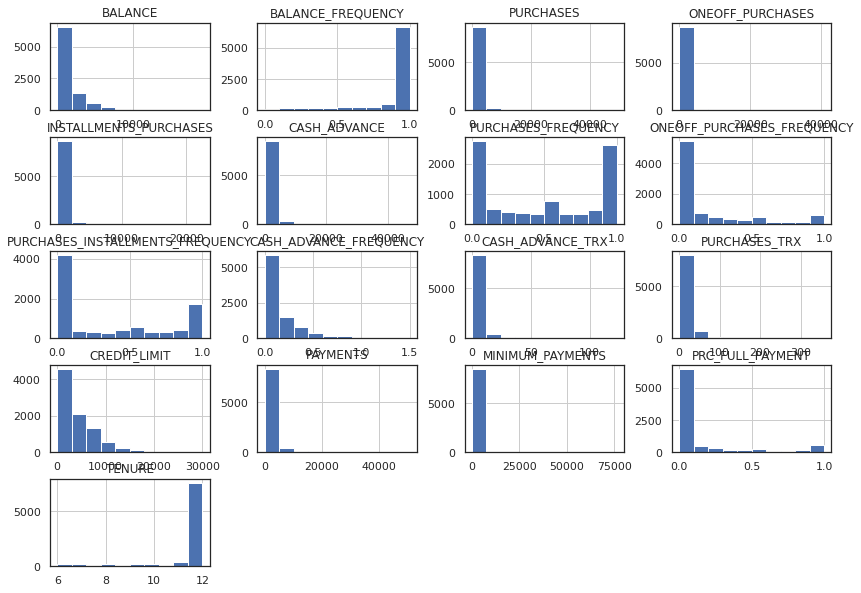

In [7]:
hist = df.hist()

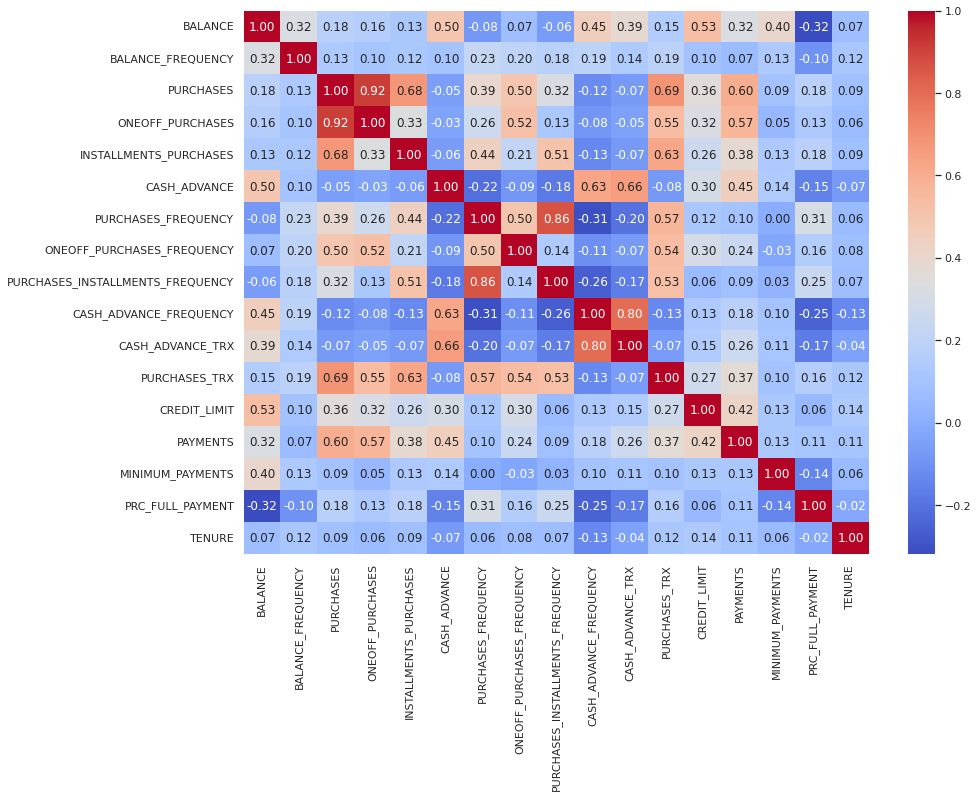

In [8]:
#Correlation Matrix
g=sns.heatmap(df.corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Let's use [Gaussian Mixture Model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to cluster our data.

Like K-Means, GMM is not a classification model. It does not try to fit the data to given labels. Hence, we do not need to separate our data to Train and Test sets.

However, columns such as the ID columns, are not 'interesting' for us, and the columns 'age' and	'gender' are categorical and must be converted to a numeric value.

In [9]:
##### YOUR TURN #############
# 1) Clean the NaN values fro the dataset
# 2) save the clean dataframe under a variable 'X'
# 3) Instantiate an instance of the GaussianMixture in a variable named gmm, with 2 clusters
# 4) fit it to the training data.
# 5) After checking the rest of this code, try different covariance types 
# (e.g. full, tied, etc.) - see how it affects the result in the charts

X = df.fillna(value=-1)
gmm = GaussianMixture(n_components=3, covariance_type="full").fit(X)

#############################

In Sklearn,  𝑔𝑚𝑚.𝑝𝑟𝑒𝑑𝑖𝑐𝑡(𝑋)  the model assigns every data point to one of the clusters and  𝑔𝑚𝑚.𝑝𝑟𝑒𝑑𝑖𝑐𝑡_𝑝𝑟𝑜𝑏𝑎(𝑋)  function return the probabilities that a data point belongs to each of the K clusters.

Sklearn's GaussianMixture also comes with different options to constrain the covariance of the difference classes estimated: 

*spherical*, *diagonal*, *tied* or full covariance.

In [10]:
labels = gmm.predict(X)

In [25]:
print(f'While the labels just tell us what is the dominant cluster: {gmm.predict(X)}')
print(f'We can see the certainty of matching the values to the different clusters: {np.round(gmm.predict_proba(X), 4)}')

While the labels just tell us what is the dominant cluster: [0 1 1 ... 0 0 2]
We can see the certainty of matching the values to the different clusters: [[9.998e-01 2.000e-04 0.000e+00]
 [0.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00 0.000e+00]
 ...
 [1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00]]


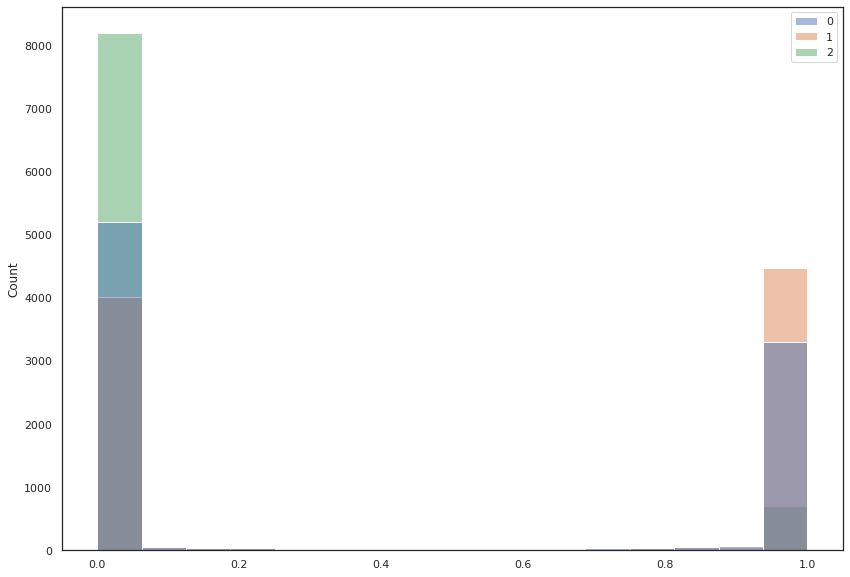

In [ ]:
sns.histplot(gmm.predict_proba(X))

Just for the sake of the demo, let's try to reduce the dimensionality using PCA, re-run the GMM on it and plot the data:

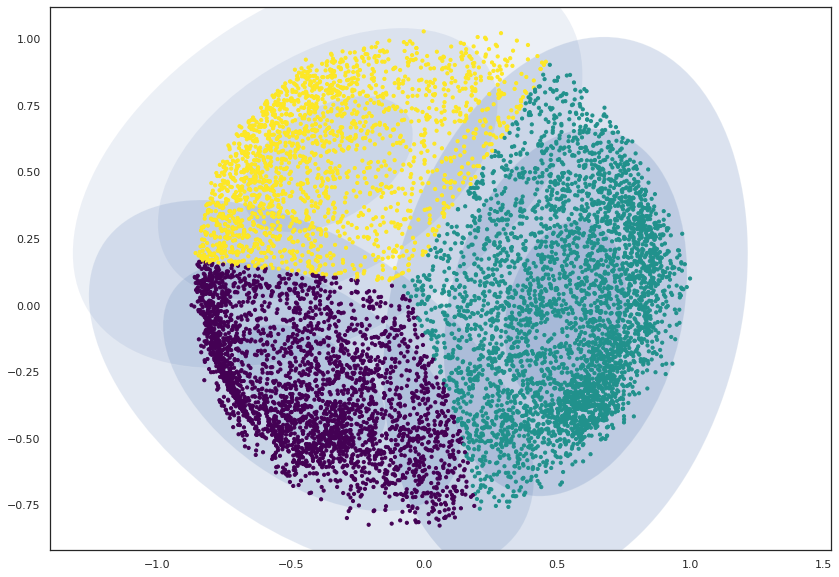

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, labels=None, ax=None):
    ax = ax or plt.gca()
    if labels is not None:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df.fillna(value=-1)) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# reduce the dimensionality to 2 
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(normalized_df)

# and fit the gmm again on the reduced data
reduced_labels = gmm.fit(Y_sklearn).predict(Y_sklearn)

plot_gmm(gmm, Y_sklearn, reduced_labels)


## Gaussian Mixture Models Clustering Algorithm Explained 
Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means. There are, however, a couple of advantages to using Gaussian mixture models over k-means.

* k-means does not account for variance (width of the bell shape curve). In two dimensions, variance/ covariance determines the shape of the distribution.


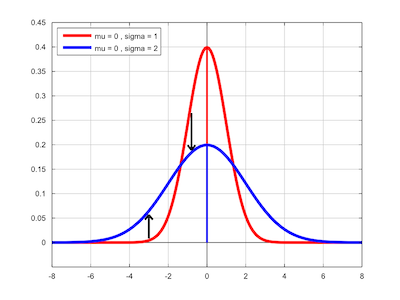

k-means model places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.

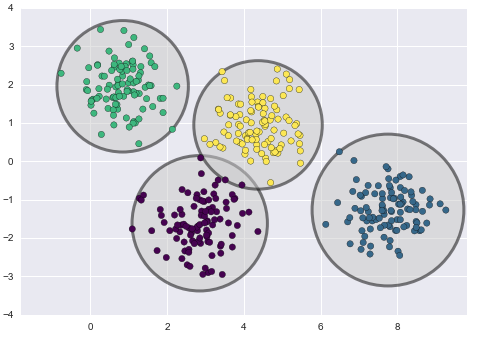

This works fine for when data is circular. However, when data takes on different shape, we end up with something like this:

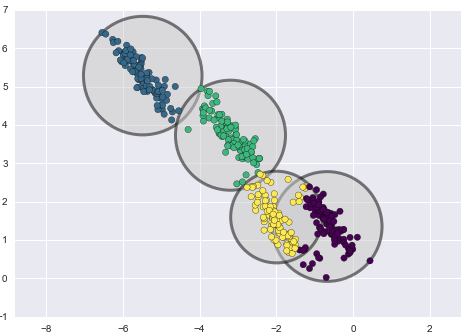



In contrast, Gaussian mixture models can handle even elongated data clusters:
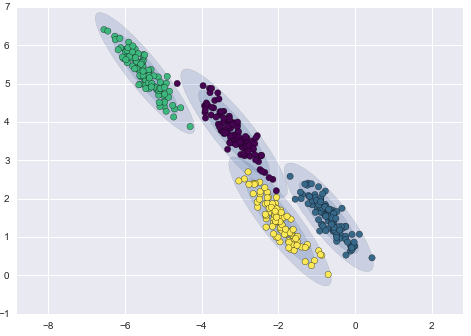


* K-means performs hard classification whereas GMM performs soft classification, i.e. in k-means, data point is deterministically assigned to one and only one cluster, but in reality there may be overlapping between the cluster GMM provide us the probabilities of the data point belonging to each of the possible clusters.

## Gaussian Mixture Models At A Glance
As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

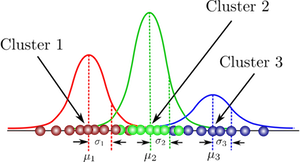

Every distribution is multiplied by a weight  𝜋 ( 𝜋1+𝜋2+𝜋3=1 ) to account for the fact that we do not have an equal number of samples from each category. In other words, we might only have included 1000 people from the red cluster class and 100,000 people from the green cluster class.



## Expectation Maximization
### Expectation

The first step, known as the expectation step or  $𝐸$  step, consists of calculating the expectation of the component assignments  $𝐶_𝑘$  for each data point  $x_i∈𝑋$  given the model parameters  $𝜋_𝑘$,   $𝜇_𝑘$  and  $𝜎_𝑘$.

### Maximization

The second step is known as the maximization step or $𝑀$  step, which consists of maximizing the expectations calculated in the $E$ step with respect to the model parameters. This step consists of updating the values $𝜋_𝑘$, $𝜇_𝑘$,  and $𝜎_𝑘$.

The entire iterative process repeats until the algorithm converges, giving a *maximum-likelihood* estimate. Intuitively, the algorithm works because knowing the component assignment  $𝐶_𝑘$  for each  $𝑥_𝑖$  makes solving for  $𝜋_𝑘$,   $𝜇_𝑘$  and  $𝜎_𝑘$  easy while knowing  $𝜋_𝑘$,   $𝜇_𝑘$,   $𝜎_𝑘$  makes inferring  $𝑝(𝐶_𝑘|𝑥_𝑖)$  easy. The expectation step corresponds to the latter case, while the maximization step corresponds to the former. Thus, by alternating between which values are assumed fixed, or known, *maximum-likelihood* estimates if the non-fixed values can be calculated efficiently.

### Algorithm
1. Initialize the mean  $𝜇_𝑘$, the covariance matrix $Σ_𝑘$  and the mixing coefficients  $𝜋_𝑘$  by some random values(or other values).
2. Compute the $𝐶_k$  values for all $k$.
3. Estimate all the parameters again using the current $C_k$ values.
4. Compute log-likelihood function.
5. Put some convergence criterion
6. If the log-likelihood value converges to some value (or if all the parameters converge to some values) then stop, else return to Step 2.

This algorithm only guarantees that we land to a locally optimal point, but it does not guarantee that these local optima are also the global ones. And so, if the algorithm starts from different initialization points, in general, it lands into different configurations.



# Choosing the number of components

Previously we learned about the **elbow rule**. Here's another method of selecting the number of components.

## Silhouette Coefficient Score

Silhouette Coefficient score checks how compact the clusters are and how well they are separated. The value ranges between -1 to 1. The closer the score is to one, the better the clustering is:

* 1: The clusters are well apart from each other and well distinguished.
* 0: The clusters are indifferent, or the distance between the clusters is not significant.
* -1: The clusters are reversely assigned.

Sklearn already has an implementation to calculate the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). You can [read more about it here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Since the fitting procedure is not deterministic, we can use statistics:

* We will run twenty fits for each number of clusters
* We will consider the mean value and the standard deviation of the best *five runs*.



In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
n_clusters = np.arange(2, 8)
sils = []
sils_err = []
repeatition = 20
X = Y_sklearn # df.drop('target', axis=1)

for n in n_clusters:
    tmp_sil = []
    for _ in range(repeatition):
        gmm=GaussianMixture(n_components=n, n_init=2).fit(X) 
        labels=gmm.predict(X)
        sil=silhouette_score(X, labels, metric='euclidean')
        tmp_sil.append(sil)
    
    arr = np.array(tmp_sil)
    dx = np.argsort(arr)[:int(repeatition/5)]
    val=np.mean(arr[dx])
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

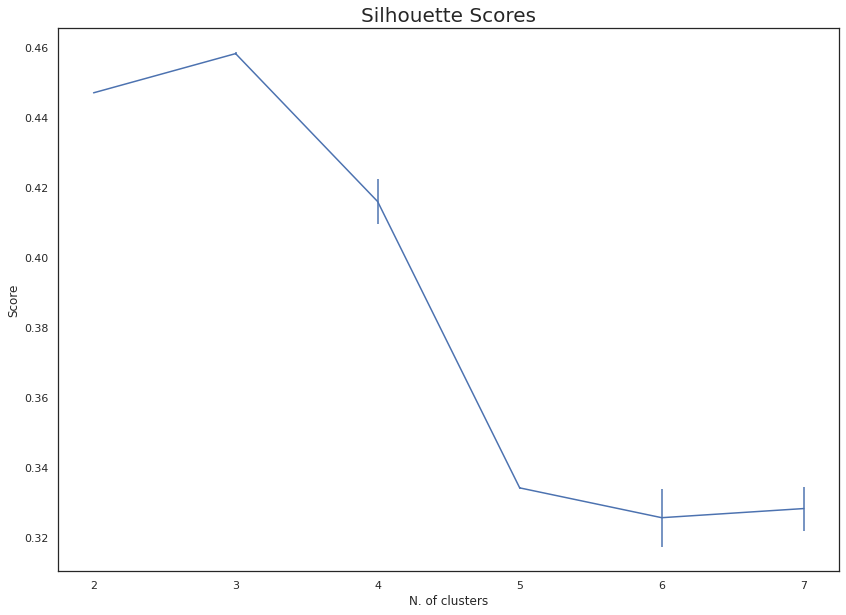

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()

What is the best number of clusters that fit our data?

Try changing the GMM accordingly and check again the data vizualization.

Using `sklearn.metrics.silhouette_samples` it is also posible to [plot and visualize the silhouettes](https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111)

## Bayesian information criterion (BIC)

This criterion estimates how good the GMM is in predicting the given data. The lower is the BIC, the better the model is. To avoid overfitting, this technique penalizes models with a large number of clusters.



In [ ]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
X = Y_sklearn # df.drop('target', axis=1)

for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X) 
        
        tmp_bic.append(gmm.bic(X))
      
    arr = np.array(tmp_bic)
    dx = np.argsort(arr)[:int(repeatition/5)]
    val=np.mean(arr[dx])
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

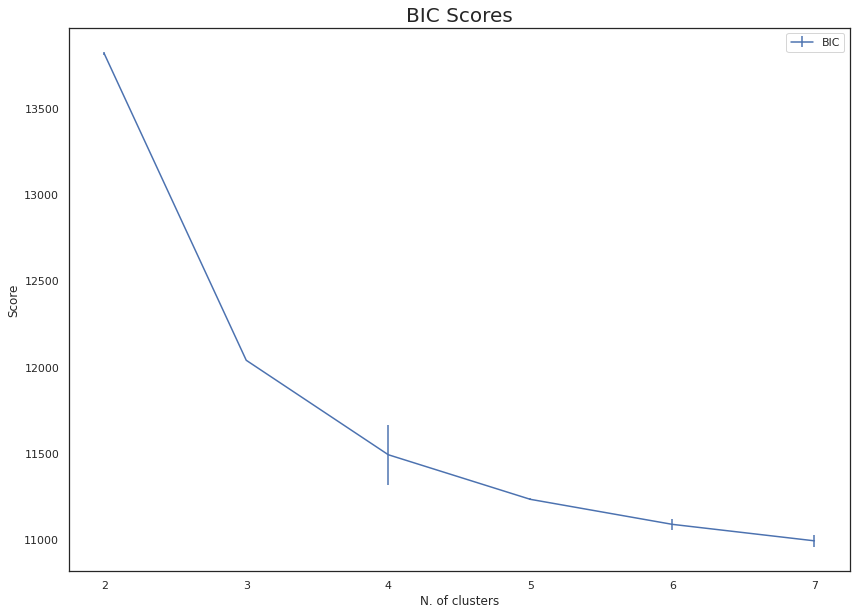

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

Basec on the BIC score, Seems that 3-4 clusters would be the best for this data

## Akaike information criterion

[Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) is another way to estimate the number of components. It is similar to the BIC method but is more severe for a large number of clusters.

As with the BIC, sklearn has an [implementation of the AIC score for GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.aic).

In [ ]:
### YOUR TURN ####

# Plot the AIC score of the GMM model.




##################

# Generating new data

GMM is a **generative model**. Since it is a statistical model, in addition to clustering data, it can also generate new points that are drown from the calculated distributions.



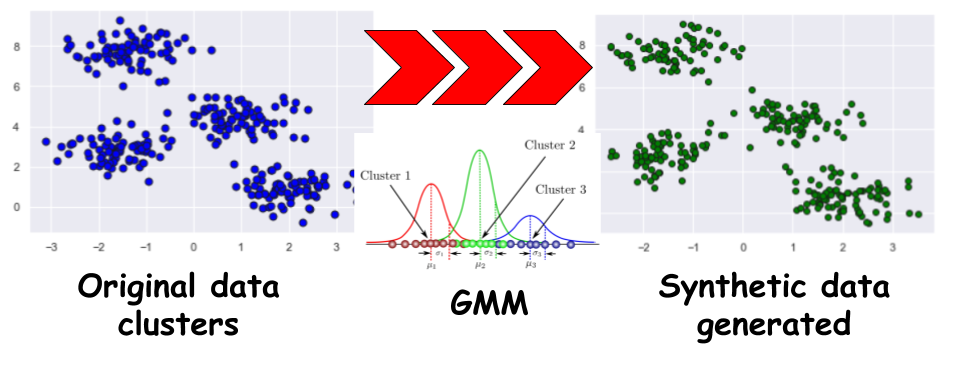

To see how it works, let's use GMM this time on a different type of data - on our MNIST digits images.

In [ ]:
from sklearn.datasets import load_digits

(1797, 64)


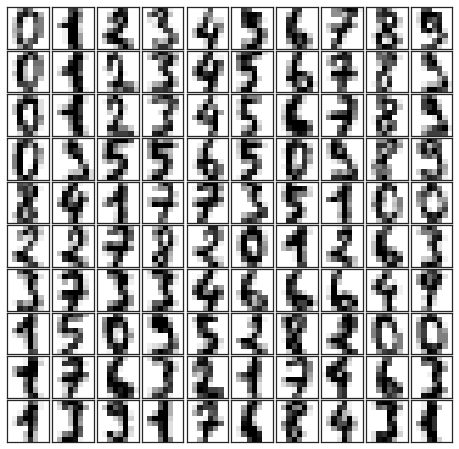

In [ ]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)



digits = load_digits()
plot_digits(digits.data)
print(digits.data.shape)

We have here nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more. 

GMMs can have difficulty converging in such a high dimensional space, so we will again reduce the dimensionality with PCA, asking it to preserve 99% of the variance in the projected data:

In [ ]:
pca = PCA(0.99, whiten=True)
reduced_data = pca.fit_transform(digits.data)
reduced_data.shape

(1797, 41)

The result has 41 dimensions, a reduction of nearly 1/3 with almost no information loss. Given this projected data, let's use the AIC to get a gauge for the number of GMM components we should use:

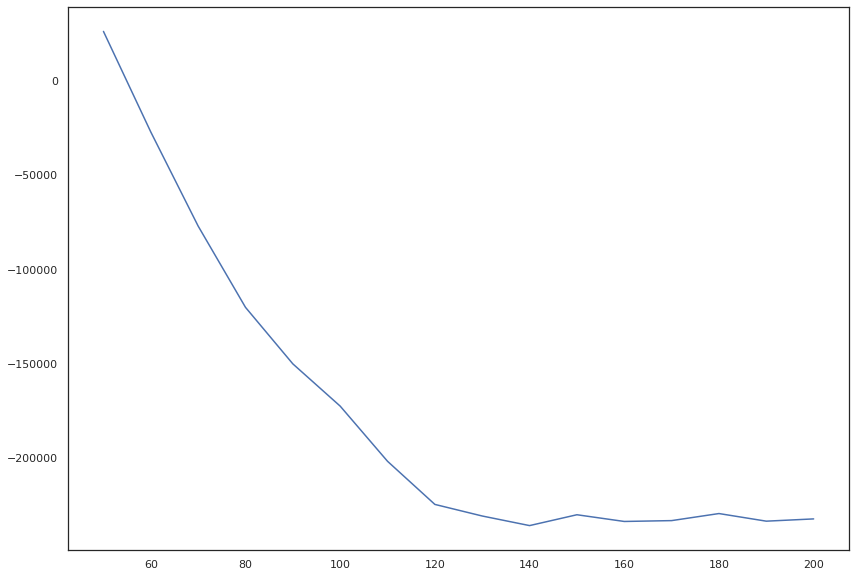

In [ ]:
# Note: np.arange is similar to python's range, but with some more capabilities.
# here, we generate a list of numbers from 50 to 210, in steps of 10.
n_components = np.arange(50, 210, 10)

models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]

aics = [model.fit(reduced_data).aic(reduced_data) for model in models]
plt.plot(n_components, aics);

We can use `140` as our number of clusters.

Let's fit our GMM and ensure it converges.

In [ ]:
### Your Turn ####
# Create here a GaussianMixture with 140 clusters (as was recommended by the 
# AIC score), using a 'full' covariance_type and fit it to the reduced_data.

gmm = GaussianMixture(140, covariance_type='full', random_state=0)
gmm.fit(reduced_data)



#################

GaussianMixture(n_components=140, random_state=0)

In [ ]:
assert gmm.converged_

Now we can draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model:

In [ ]:
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

Finally, we use the inverse transform of our PCA object to return to the original dimensionality and construct the new digits:

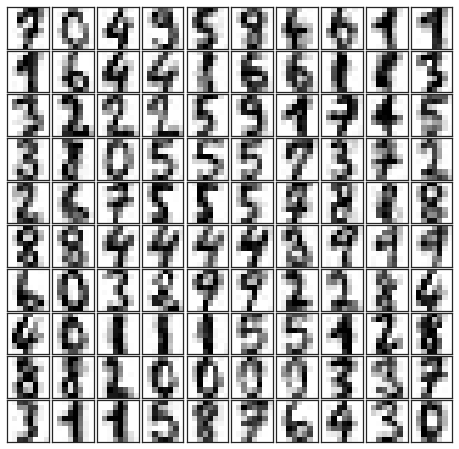

In [ ]:
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

# Binomial distributions

We have seen several techniques to model so far for classification and clustering.

The Gaussian Mixture Model was our first step in involving statistics and distributions into our models. 

However, Gaussian distribution isn't the only type of distribution. 

To understand the statistical properties and the probabilities behind them, we need to dive deeper into additional types of distributions.

And we start this journey with the *Binomial Distribution*

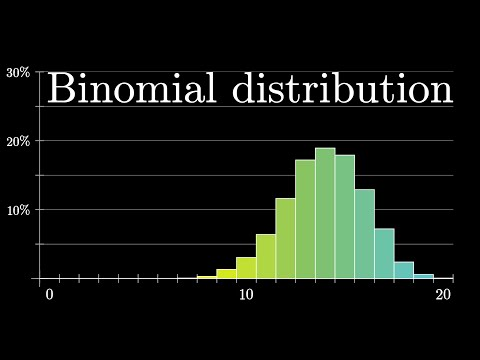

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('8idr1WZ1A7Q')